In [226]:
from mmdata import *
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [227]:
conference_away.head()

,YEAR,CONF ID,CONF,BADJ EM,BADJ O,BADJ D,BARTHAG,G,W,L,...,AVG HGT,EFF HGT,EXP,TALENT,FT%,OP FT%,PPPO,PPPD,ELITE SOS,WAB
0,2024,1,A10,5.1,109.2,104.1,0.634,167,65,102,...,77.133,80.264,1.884,18.386,73.4,72.5,1.045,1.088,30.416,-2.3
1,2024,2,ACC,10.0,110.9,100.9,0.748,169,64,105,...,77.897,81.078,1.653,62.324,72.6,74.4,1.035,1.093,43.482,-0.9
2,2024,3,AE,-5.7,100.9,106.6,0.347,150,57,93,...,76.776,79.091,2.147,6.236,69.8,72.3,0.996,1.057,17.208,-6.4
3,2024,4,Amer,3.3,108.1,104.8,0.588,161,64,97,...,77.293,80.347,2.237,30.455,70.3,73.4,1.050,1.094,26.317,-2.8
4,2024,5,ASun,-8.0,103.5,111.5,0.298,195,50,145,...,76.777,79.668,2.026,8.164,72.8,72.2,1.034,1.142,18.353,-8.0


In [228]:
# Merge Conference play data
conference_away.groupby("CONF")
conference_home.groupby("CONF")
conference_play =pd.concat([conference_home, conference_away], axis=1)
conference_away_neutral.groupby("CONF")
conference_play = pd.concat([conference_play, conference_away_neutral], axis=1)
print(conference_play)

     YEAR  CONF ID  CONF  BADJ EM  BADJ O  BADJ D  BARTHAG    G    W   L  ...  \
0    2024        1   A10      5.7   108.0   102.3    0.651  241  169  72  ...   
1    2024        2   ACC     13.0   111.9    98.9    0.805  250  180  70  ...   
2    2024        3    AE     -5.1   101.7   106.8    0.363  112   70  42  ...   
3    2024        4  Amer      4.4   108.6   104.2    0.617  215  143  72  ...   
4    2024        5  ASun     -8.1   104.2   112.3    0.297  145   93  52  ...   
..    ...      ...   ...      ...     ...     ...      ...  ...  ...  ..  ...   
514  2008       21   NEC     -9.6    96.8   106.4    0.252  156   77  79  ...   
515  2008       22   OVC     -9.8    98.7   108.5    0.252  137   77  60  ...   
516  2008       35   ind    -13.2    94.3   107.5    0.181   86   37  49  ...   
517  2008       18  MEAC    -13.3    91.9   105.2    0.175  119   75  44  ...   
518  2008       31  SWAC    -18.2    91.0   109.2    0.109  101   53  48  ...   

     AVG HGT  EFF HGT    EX

In [229]:
#Conver to DataFrame
conference_play = pd.DataFrame(conference_play)
conference_play

,YEAR,CONF ID,CONF,BADJ EM,BADJ O,BADJ D,BARTHAG,G,W,L,...,AVG HGT,EFF HGT,EXP,TALENT,FT%,OP FT%,PPPO,PPPD,ELITE SOS,WAB
0,2024,1,A10,5.7,108.0,102.3,0.651,241,169,72,...,77.133,80.264,1.884,18.386,73.3,72.0,1.039,1.070,28.329,-3.1
1,2024,2,ACC,13.0,111.9,98.9,0.805,250,180,70,...,77.897,81.078,1.653,62.324,73.6,74.2,1.042,1.085,41.170,-1.0
2,2024,3,AE,-5.1,101.7,106.8,0.363,112,70,42,...,76.776,79.091,2.147,6.236,70.0,72.0,1.000,1.054,16.777,-6.5
3,2024,4,Amer,4.4,108.6,104.2,0.617,215,143,72,...,77.293,80.347,2.237,30.455,70.6,72.5,1.045,1.084,25.626,-3.9
4,2024,5,ASun,-8.1,104.2,112.3,0.297,145,93,52,...,76.777,79.668,2.026,8.164,73.0,72.4,1.038,1.136,17.471,-8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2008,21,NEC,-9.6,96.8,106.4,0.252,156,77,79,...,76.372,79.194,1.632,6.229,67.5,66.7,0.948,1.052,17.013,-8.6
515,2008,22,OVC,-9.8,98.7,108.5,0.252,137,77,60,...,76.133,79.111,1.713,9.039,67.8,70.2,0.991,1.082,14.722,-8.7
516,2008,35,ind,-13.2,94.3,107.5,0.181,86,37,49,...,75.951,79.037,1.791,4.541,64.9,66.5,0.914,1.059,16.911,-9.8
517,2008,18,MEAC,-13.3,91.9,105.2,0.175,119,75,44,...,75.529,78.734,1.671,1.135,66.0,69.1,0.881,1.098,21.032,-8.1


In [230]:
conference_play.columns

Index(['YEAR', 'CONF ID', 'CONF', 'BADJ EM', 'BADJ O', 'BADJ D', 'BARTHAG',
       'G', 'W', 'L',
       ...
       'AVG HGT', 'EFF HGT', 'EXP', 'TALENT', 'FT%', 'OP FT%', 'PPPO', 'PPPD',
       'ELITE SOS', 'WAB'],
      dtype='object', length=135)

In [231]:
# Encocded conference play data
conference_play_encoded = pd.get_dummies(conference_play)

In [232]:
heat_check

,YEAR,TEAM NO,TEAM,SEED,ROUND,POWER,PATH,DRAW,WINS,POOL VALUE,POOL S-RANK,NCAA S-RANK,VAL Z-SCORE,POWER-PATH
0,2024,1067,Connecticut,1,0,91.3,64.5,NaN,0,92.6,1,1,NaN,26.8
1,2024,1026,Stetson,16,0,47.1,91.0,NaN,0,0.5,64,62,NaN,-43.9
2,2024,1060,Florida Atlantic,8,0,69.3,73.2,NaN,0,9.0,28,31,NaN,-3.9
3,2024,1036,Northwestern,9,0,62.9,75.5,NaN,0,4.2,45,36,NaN,-12.6
4,2024,1029,San Diego St.,5,0,71.5,68.2,NaN,0,14.7,22,18,NaN,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,2013,336,VCU,5,32,70.8,73.3,-1.58,1,7.8,38,20,-1.170,-2.5
700,2013,335,Villanova,9,64,60.5,78.4,-1.20,0,3.0,52,38,-1.227,-17.9
701,2013,334,Western Kentucky,16,64,50.0,86.1,0.12,0,0.9,62,61,0.311,-36.1
702,2013,333,Wichita St.,9,4,68.7,81.1,-2.03,4,5.7,45,35,-0.553,-12.4


In [233]:

heat_check = heat_check.drop(columns=['TEAM NO'])
heat_check = heat_check.dropna()
heat_check.head()

,YEAR,TEAM,SEED,ROUND,POWER,PATH,DRAW,WINS,POOL VALUE,POOL S-RANK,NCAA S-RANK,VAL Z-SCORE,POWER-PATH
64,2023,Alabama,1,16,85.2,63.8,1.51,2,74.7,4,1,0.144,21.4
65,2023,Arizona,2,64,80.9,65.3,0.65,0,57.5,7,7,-0.247,15.6
66,2023,Arizona St.,11,64,60.2,75.2,-0.27,0,4.3,48,45,-0.714,-15.0
67,2023,Arkansas,8,16,78.1,75.6,-0.60,2,23.1,19,30,2.032,2.5
68,2023,Auburn,9,32,71.9,72.7,0.54,1,13.8,26,35,1.469,-0.8


In [234]:
team_resume

,YEAR,TEAM NO,TEAM,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,Q2 W,Q1 PLUS Q2 W,Q3 Q4 L,PLUS 500,R SCORE,BID TYPE
0,2024,1079,Akron,14,0,106,131,104,103,111.5,0,2,2,4,13,0.00,At-Large
1,2024,1078,Alabama,4,0,10,31,15,31,11.5,4,7,11,0,11,99.35,At-Large
2,2024,1077,Arizona,2,0,4,10,11,14,5.5,8,7,15,1,18,99.87,At-Large
3,2024,1076,Auburn,4,0,5,45,9,5,4.0,3,10,13,0,21,99.42,At-Large
4,2024,1075,Baylor,3,0,13,8,10,25,13.5,10,4,14,0,14,99.73,At-Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,5,West Virginia,7,16,29,32,28,29,20.0,3,2,5,1,13,96.80,At-Large
1075,2008,4,Western Kentucky,12,16,39,124,46,25,45.0,0,1,1,1,19,5.30,Auto
1076,2008,3,Winthrop,13,64,108,121,108,93,96.0,1,2,3,7,9,0.00,Auto
1077,2008,2,Wisconsin,3,16,11,9,8,5,6.0,6,2,8,0,25,99.90,Auto


In [235]:
team_results 

,TEAM ID,TEAM,PAKE,PAKE RANK,PASE,PASE RANK,GAMES,W,L,WIN%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,1,Abilene Christian,0.7,45,0.7,52,3,1,2,0.333,2,1,0,0,0,0,0,0,0.10%,0.00%
1,2,Akron,-0.9,179,-1.1,187,4,0,4,0.000,4,0,0,0,0,0,0,0,0.50%,0.00%
2,3,Alabama,-2.1,211,-2.9,220,10,5,5,0.500,5,3,2,0,0,0,0,2,48.40%,15.40%
3,4,Albany,-0.4,147,-0.3,138,3,0,3,0.000,3,0,0,0,0,0,0,0,0.00%,0.00%
4,6,American,-0.5,160,-0.4,150,3,0,3,0.000,3,0,0,0,0,0,0,0,0.20%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,241,Wofford,-1.2,191,-0.9,175,6,1,5,0.167,5,1,0,0,0,0,0,0,3.60%,0.20%
232,242,Wright St.,-0.2,118,-0.2,119,2,0,2,0.000,2,0,0,0,0,0,0,0,0.00%,0.00%
233,243,Wyoming,-0.2,118,-0.5,159,1,0,1,0.000,1,0,0,0,0,0,0,0,0.00%,0.00%
234,244,Xavier,4.1,14,2.7,22,28,18,10,0.643,10,9,7,2,0,0,0,2,51.90%,8.70%


In [236]:
#Find correlation between team resume and team results
team_results.reset_index(drop=True, inplace=True) 
team_reslults = team_results.groupby('TEAM')
team_results

,TEAM ID,TEAM,PAKE,PAKE RANK,PASE,PASE RANK,GAMES,W,L,WIN%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,1,Abilene Christian,0.7,45,0.7,52,3,1,2,0.333,2,1,0,0,0,0,0,0,0.10%,0.00%
1,2,Akron,-0.9,179,-1.1,187,4,0,4,0.000,4,0,0,0,0,0,0,0,0.50%,0.00%
2,3,Alabama,-2.1,211,-2.9,220,10,5,5,0.500,5,3,2,0,0,0,0,2,48.40%,15.40%
3,4,Albany,-0.4,147,-0.3,138,3,0,3,0.000,3,0,0,0,0,0,0,0,0.00%,0.00%
4,6,American,-0.5,160,-0.4,150,3,0,3,0.000,3,0,0,0,0,0,0,0,0.20%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,241,Wofford,-1.2,191,-0.9,175,6,1,5,0.167,5,1,0,0,0,0,0,0,3.60%,0.20%
232,242,Wright St.,-0.2,118,-0.2,119,2,0,2,0.000,2,0,0,0,0,0,0,0,0.00%,0.00%
233,243,Wyoming,-0.2,118,-0.5,159,1,0,1,0.000,1,0,0,0,0,0,0,0,0.00%,0.00%
234,244,Xavier,4.1,14,2.7,22,28,18,10,0.643,10,9,7,2,0,0,0,2,51.90%,8.70%


In [237]:
team_resume

,YEAR,TEAM NO,TEAM,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,Q2 W,Q1 PLUS Q2 W,Q3 Q4 L,PLUS 500,R SCORE,BID TYPE
0,2024,1079,Akron,14,0,106,131,104,103,111.5,0,2,2,4,13,0.00,At-Large
1,2024,1078,Alabama,4,0,10,31,15,31,11.5,4,7,11,0,11,99.35,At-Large
2,2024,1077,Arizona,2,0,4,10,11,14,5.5,8,7,15,1,18,99.87,At-Large
3,2024,1076,Auburn,4,0,5,45,9,5,4.0,3,10,13,0,21,99.42,At-Large
4,2024,1075,Baylor,3,0,13,8,10,25,13.5,10,4,14,0,14,99.73,At-Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,5,West Virginia,7,16,29,32,28,29,20.0,3,2,5,1,13,96.80,At-Large
1075,2008,4,Western Kentucky,12,16,39,124,46,25,45.0,0,1,1,1,19,5.30,Auto
1076,2008,3,Winthrop,13,64,108,121,108,93,96.0,1,2,3,7,9,0.00,Auto
1077,2008,2,Wisconsin,3,16,11,9,8,5,6.0,6,2,8,0,25,99.90,Auto


In [238]:
# Merge team resume and team results
team_resume_results = pd.merge(team_resume, team_results, on='TEAM')
team_resume_results

,YEAR,TEAM NO,TEAM,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,...,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,2024,1079,Akron,14,0,106,131,104,103,111.5,...,4,0,0,0,0,0,0,0,0.50%,0.00%
1,2022,943,Akron,13,64,127,139,115,83,121.7,...,4,0,0,0,0,0,0,0,0.50%,0.00%
2,2013,399,Akron,12,64,42,91,45,38,52.0,...,4,0,0,0,0,0,0,0,0.50%,0.00%
3,2011,263,Akron,15,64,107,144,123,92,125.0,...,4,0,0,0,0,0,0,0,0.50%,0.00%
4,2009,130,Akron,13,64,99,104,115,89,94.0,...,4,0,0,0,0,0,0,0,0.50%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,2009,88,Portland St.,13,64,113,148,95,96,112.0,...,2,0,0,0,0,0,0,0,0.00%,0.00%
1059,2008,25,Portland St.,16,64,90,168,91,70,108.0,...,2,0,0,0,0,0,0,0,0.00%,0.00%
1060,2008,21,San Diego,13,32,94,72,102,72,122.0,...,1,1,0,0,0,0,0,0,0.10%,0.00%
1061,2008,19,South Alabama,10,64,38,70,50,41,56.0,...,1,0,0,0,0,0,0,0,0.30%,0.00%


In [239]:
team_resume_results = team_resume_results.groupby('TEAM').sum()
team_resume_results

,YEAR,TEAM NO,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,...,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
TEAM,,,,,,,,,,,,,,,,,,,,,
Abilene Christian,4040,1682,29,96,228,329,143,150,239.3,0,...,4,2,0,0,0,0,0,0,0.10%0.10%,0.00%0.00%
Akron,10079,2814,67,256,481,609,502,405,504.2,2,...,20,0,0,0,0,0,0,0,0.50%0.50%0.50%0.50%0.50%,0.00%0.00%0.00%0.00%0.00%
Alabama,12120,4975,31,192,127,104,157,228,123.6,43,...,30,18,12,0,0,0,0,12,48.40%48.40%48.40%48.40%48.40%48.40%,15.40%15.40%15.40%15.40%15.40%15.40%
Albany,6042,1400,45,192,415,537,377,300,471.0,0,...,9,0,0,0,0,0,0,0,0.00%0.00%0.00%,0.00%0.00%0.00%
American,6031,659,44,192,282,499,345,264,370.0,0,...,9,0,0,0,0,0,0,0,0.20%0.20%0.20%,0.00%0.00%0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wofford,10069,1941,61,288,391,544,388,306,483.3,5,...,25,5,0,0,0,0,0,0,3.60%3.60%3.60%3.60%3.60%,0.20%0.20%0.20%0.20%0.20%
Wright St.,4040,1551,30,128,290,402,285,236,308.0,1,...,4,0,0,0,0,0,0,0,0.00%0.00%,0.00%0.00%
Wyoming,4037,1346,24,132,121,94,101,103,180.3,9,...,2,0,0,0,0,0,0,0,0.00%0.00%,0.00%0.00%


In [240]:
team_resume_results.columns

Index(['YEAR', 'TEAM NO', 'SEED', 'ROUND', 'NET RPI', 'RESUME', 'WAB RANK',
       'ELO', 'B POWER', 'Q1 W', 'Q2 W', 'Q1 PLUS Q2 W', 'Q3 Q4 L', 'PLUS 500',
       'R SCORE', 'BID TYPE', 'TEAM ID', 'PAKE', 'PAKE RANK', 'PASE',
       'PASE RANK', 'GAMES', 'W', 'L', 'WIN%', 'R64', 'R32', 'S16', 'E8', 'F4',
       'F2', 'CHAMP', 'TOP2', 'F4%', 'CHAMP%'],
      dtype='object')

In [241]:
# Merge team resume results with conference play data
team_resume_results_conference = pd.concat([team_resume_results, conference_play_encoded], axis=1)

In [242]:
#Merge with heat check data
team_resume_results_conference_heat = pd.concat([team_resume_results_conference, heat_check], axis=1)
team_resume_results_conference_heat

,YEAR,TEAM NO,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,...,ROUND,POWER,PATH,DRAW,WINS,POOL VALUE,POOL S-RANK,NCAA S-RANK,VAL Z-SCORE,POWER-PATH
Abilene Christian,4040.0,1682.0,29.0,96.0,228.0,329.0,143.0,150.0,239.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akron,10079.0,2814.0,67.0,256.0,481.0,609.0,502.0,405.0,504.2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama,12120.0,4975.0,31.0,192.0,127.0,104.0,157.0,228.0,123.6,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany,6042.0,1400.0,45.0,192.0,415.0,537.0,377.0,300.0,471.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American,6031.0,659.0,44.0,192.0,282.0,499.0,345.0,264.0,370.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,70.8,73.3,-1.58,1.0,7.8,38.0,20.0,-1.170,-2.5
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,60.5,78.4,-1.20,0.0,3.0,52.0,38.0,-1.227,-17.9
701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,50.0,86.1,0.12,0.0,0.9,62.0,61.0,0.311,-36.1
702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,68.7,81.1,-2.03,4.0,5.7,45.0,35.0,-0.553,-12.4


In [243]:
# Upsets 
upsets = pd.concat([num_of_upsets, upeset_seed_info], axis=1)
upsets


,YEAR,FIRST ROUND,SECOND ROUND,SWEET 16,ELITE 8,FINAL 4,TOTAL,YEAR,CURRENT ROUND,SEED WON,SEED LOST,SEED DIFF
0,2023.0,5.0,4.0,3.0,2.0,0.0,14.0,2023,64,13,4,9
1,2022.0,7.0,5.0,4.0,0.0,1.0,17.0,2023,64,15,2,13
2,2021.0,9.0,6.0,2.0,1.0,0.0,18.0,2023,64,16,1,15
3,2019.0,8.0,0.0,1.0,2.0,0.0,11.0,2023,64,11,6,5
4,2018.0,6.0,5.0,3.0,1.0,0.0,15.0,2023,64,10,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,64,12,5,7
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,64,13,4,9
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,32,10,2,8
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,32,7,2,5


In [244]:
# Merge upsets with the rest
tourney_data = pd.concat([team_resume_results_conference_heat, upsets], axis=1)
tourney_data

,YEAR,TEAM NO,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,...,SECOND ROUND,SWEET 16,ELITE 8,FINAL 4,TOTAL,YEAR,CURRENT ROUND,SEED WON,SEED LOST,SEED DIFF
Abilene Christian,4040.0,1682.0,29.0,96.0,228.0,329.0,143.0,150.0,239.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akron,10079.0,2814.0,67.0,256.0,481.0,609.0,502.0,405.0,504.2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama,12120.0,4975.0,31.0,192.0,127.0,104.0,157.0,228.0,123.6,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany,6042.0,1400.0,45.0,192.0,415.0,537.0,377.0,300.0,471.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American,6031.0,659.0,44.0,192.0,282.0,499.0,345.0,264.0,370.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
# Change NaN to 0
tourney_data = tourney_data.fillna(0)
tourney_data

,YEAR,TEAM NO,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,...,SECOND ROUND,SWEET 16,ELITE 8,FINAL 4,TOTAL,YEAR,CURRENT ROUND,SEED WON,SEED LOST,SEED DIFF
Abilene Christian,4040.0,1682.0,29.0,96.0,228.0,329.0,143.0,150.0,239.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Akron,10079.0,2814.0,67.0,256.0,481.0,609.0,502.0,405.0,504.2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alabama,12120.0,4975.0,31.0,192.0,127.0,104.0,157.0,228.0,123.6,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albany,6042.0,1400.0,45.0,192.0,415.0,537.0,377.0,300.0,471.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American,6031.0,659.0,44.0,192.0,282.0,499.0,345.0,264.0,370.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
tourney_data.reset_index(drop=True, inplace=True)
tourney_data

,YEAR,TEAM NO,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,...,SECOND ROUND,SWEET 16,ELITE 8,FINAL 4,TOTAL,YEAR,CURRENT ROUND,SEED WON,SEED LOST,SEED DIFF
0,4040.0,1682.0,29.0,96.0,228.0,329.0,143.0,150.0,239.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10079.0,2814.0,67.0,256.0,481.0,609.0,502.0,405.0,504.2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12120.0,4975.0,31.0,192.0,127.0,104.0,157.0,228.0,123.6,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6042.0,1400.0,45.0,192.0,415.0,537.0,377.0,300.0,471.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6031.0,659.0,44.0,192.0,282.0,499.0,345.0,264.0,370.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
tourney_data = tourney_data.drop(columns=['YEAR'])

In [248]:
# Encode tourney data 
tourney_data_encoded = pd.get_dummies(tourney_data)

tourney_data_encoded


,TEAM NO,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,Q2 W,...,TEAM_Western Kentucky,TEAM_Western Michigan,TEAM_Wichita St.,TEAM_Winthrop,TEAM_Wisconsin,TEAM_Wofford,TEAM_Wright St.,TEAM_Wyoming,TEAM_Xavier,TEAM_Yale
0,1682.0,29.0,96.0,228.0,329.0,143.0,150.0,239.3,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2814.0,67.0,256.0,481.0,609.0,502.0,405.0,504.2,2.0,14.0,...,False,False,False,False,False,False,False,False,False,False
2,4975.0,31.0,192.0,127.0,104.0,157.0,228.0,123.6,43.0,35.0,...,False,False,False,False,False,False,False,False,False,False
3,1400.0,45.0,192.0,415.0,537.0,377.0,300.0,471.0,0.0,3.0,...,False,False,False,False,False,False,False,False,False,False
4,659.0,44.0,192.0,282.0,499.0,345.0,264.0,370.0,0.0,3.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False


In [249]:
# Split the data into features and target
X = tourney_data_encoded.drop(columns=['CHAMP'])
y = tourney_data_encoded['CHAMP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [250]:
# Scale the data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [254]:
# set the nodes for the length of the features
nodes = len(X.columns)

In [255]:
# Craete a mehtod that creates a new model with hyperparameters
def create_model(hp):
    model = tf.keras.models.Sequential()
    activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                 min_value=1,
                                                 max_value=10,
                                                 step=1), activation=activation, input_dim=nodes))
    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                     min_value=1,
                                                     max_value=10,
                                                     step=1), activation=activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [256]:
import kerastuner as kt
tuner = kt.Hyperband(create_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     hyperband_iterations=2)

Reloading Tuner from .\untitled_project\tuner0.json


In [257]:
# Search for the best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Trial 497 Complete [00h 00m 07s]
val_accuracy: 0.936170220375061

Best val_accuracy So Far: 0.9914893507957458
Total elapsed time: 00h 22m 44s


In [259]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'activation': 'relu',
 'first_units': 9,
 'num_layers': 7,
 'units_0': 8,
 'units_1': 7,
 'units_2': 9,
 'units_3': 8,
 'units_4': 3,
 'units_5': 1,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 4,
 'tuner/round': 0,
 'units_6': 1}

In [260]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))
print(model.evaluate(X_test_scaled, y_test))


Epoch 1/100
23/23 [==============================] - 1s 5ms/step - loss: 0.6877 - accuracy: 0.9901 - val_loss: 0.6749 - val_accuracy: 0.9915
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.9901 - val_loss: 0.6475 - val_accuracy: 0.9915
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.9901 - val_loss: 0.5889 - val_accuracy: 0.9915
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.9901 - val_loss: 0.5196 - val_accuracy: 0.9915
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.9901 - val_loss: 0.3113 - val_accuracy: 0.9915
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.9901 - val_loss: 0.2476 - val_accuracy: 0.9915
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2255 - accuracy: 0.9901 - val_loss: 0.1902 - val_accuracy: 0.9915
Epoch 8/100
2

Epoch 1/100
23/23 [==============================] - 0s 2ms/step - loss: -0.1429 - accuracy: 0.9844 - val_loss: -0.1114 - val_accuracy: 0.9702
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: -0.1449 - accuracy: 0.9844 - val_loss: -0.1131 - val_accuracy: 0.9702
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: -0.1469 - accuracy: 0.9844 - val_loss: -0.1147 - val_accuracy: 0.9702
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: -0.1484 - accuracy: 0.9844 - val_loss: -0.1171 - val_accuracy: 0.9702
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: -0.1509 - accuracy: 0.9844 - val_loss: -0.1188 - val_accuracy: 0.9702
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: -0.1527 - accuracy: 0.9844 - val_loss: -0.1208 - val_accuracy: 0.9702
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: -0.1547 - accuracy: 0.9844 - val_loss: -0.1227 - val_accuracy: 0.9702

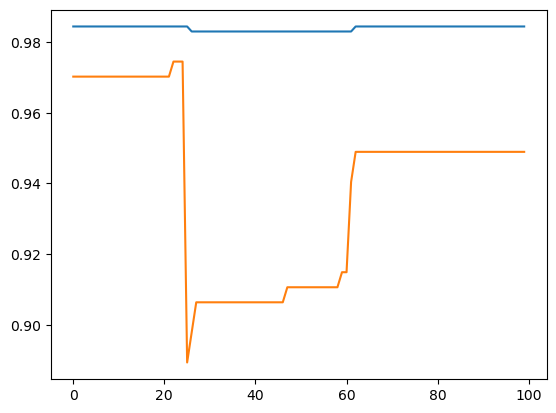

In [261]:
# Model History 
model_history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))
# Graph the model history
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])


In [264]:
# Use the model to predict the champion on team name
predictions = model.predict(X_test_scaled)
predictions

8/8 [==============================] - 0s 572us/step


array([[4.03068157e-09],
       [1.19388126e-08],
       [2.93025969e-05],
       [2.17525712e-06],
       [1.06573095e-09],
       [6.77389835e-05],
       [9.17664889e-10],
       [3.25729229e-06],
       [1.22367689e-08],
       [5.88138693e-09],
       [8.39593530e-01],
       [8.16186940e-09],
       [2.05551510e-06],
       [2.17793827e-09],
       [1.50106989e-05],
       [1.78912833e-05],
       [2.09794803e-06],
       [5.05540334e-03],
       [4.08269046e-03],
       [1.06633379e-05],
       [1.35699302e-05],
       [1.56755443e-04],
       [9.74454739e-09],
       [4.76789623e-02],
       [1.47362456e-09],
       [9.63618731e-06],
       [1.49034407e-09],
       [2.74989418e-07],
       [4.37713893e-10],
       [1.91048548e-05],
       [1.18563337e-04],
       [2.48368815e-05],
       [4.28642170e-06],
       [1.16734540e-04],
       [1.10776152e-10],
       [1.28576998e-08],
       [1.14561125e-08],
       [1.89258653e-09],
       [5.23626622e-05],
       [1.53269980e-06],


In [266]:
# Get the predicted champion
predicted_champion = predictions.argmax()
predicted_champion


10

In [267]:
# Get the team name of the predicted champion
team_name = tourney_data_encoded.columns[predicted_champion]
team_name


'Q1 PLUS Q2 W'

In [ ]:
tourney_data_encoded.columns


Index(['YEAR', 'SEED', 'ROUND', 'NET RPI', 'RESUME', 'WAB RANK', 'ELO',
       'B POWER', 'Q1 W', 'Q2 W',
       ...
       'TEAM_Western Kentucky', 'TEAM_Western Michigan', 'TEAM_Wichita St.',
       'TEAM_Winthrop', 'TEAM_Wisconsin', 'TEAM_Wofford', 'TEAM_Wright St.',
       'TEAM_Wyoming', 'TEAM_Xavier', 'TEAM_Yale'],
      dtype='object', length=1072)

In [ ]:
tourney_data.columns

Index(['YEAR', 'TEAM', 'SEED', 'ROUND', 'NET RPI', 'RESUME', 'WAB RANK', 'ELO',
       'B POWER', 'Q1 W',
       ...
       'SECOND ROUND', 'SWEET 16', 'ELITE 8', 'FINAL 4', 'TOTAL', 'YEAR',
       'CURRENT ROUND', 'SEED WON', 'SEED LOST', 'SEED DIFF'],
      dtype='object', length=196)

In [ ]:
#Group by team name
tourney_data = tourney_data.groupby('TEAM')
tourney_data

ValueError: Grouper for 'TEAM' not 1-dimensional

In [ ]:
tourney_data['TEAM']

,TEAM,TEAM,TEAM
0,Akron,Abilene Christian,0
1,Alabama,Akron,0
2,Arizona,Alabama,0
3,Auburn,Albany,0
4,Baylor,American,0
...,...,...,...
699,0,0,VCU
700,0,0,Villanova
701,0,0,Western Kentucky
702,0,0,Wichita St.
